In [5]:
import warnings
warnings.filterwarnings('ignore')

In [5]:


import numpy as np

from Binomial_helperfile import plot_asset_path, plot_probability, plot_binomial_tree

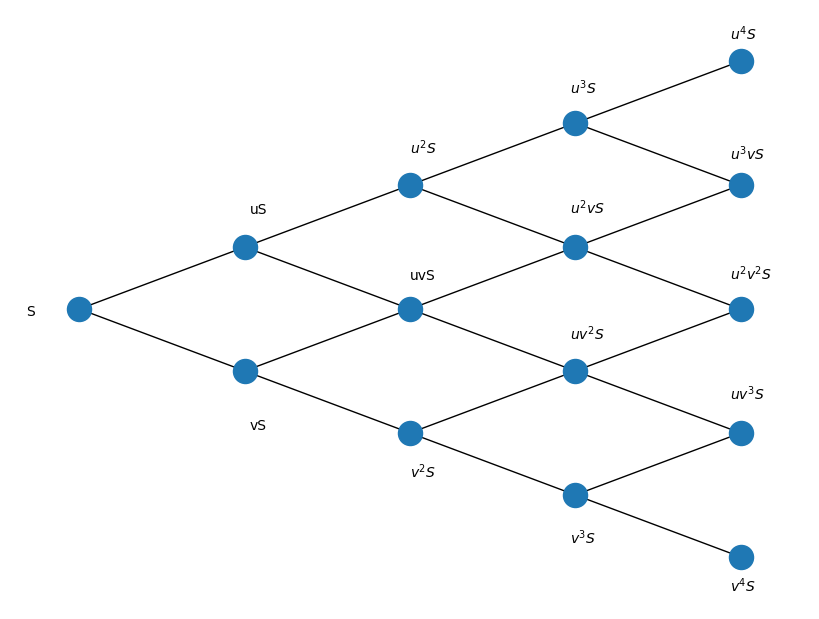

In [7]:
plot_asset_path()

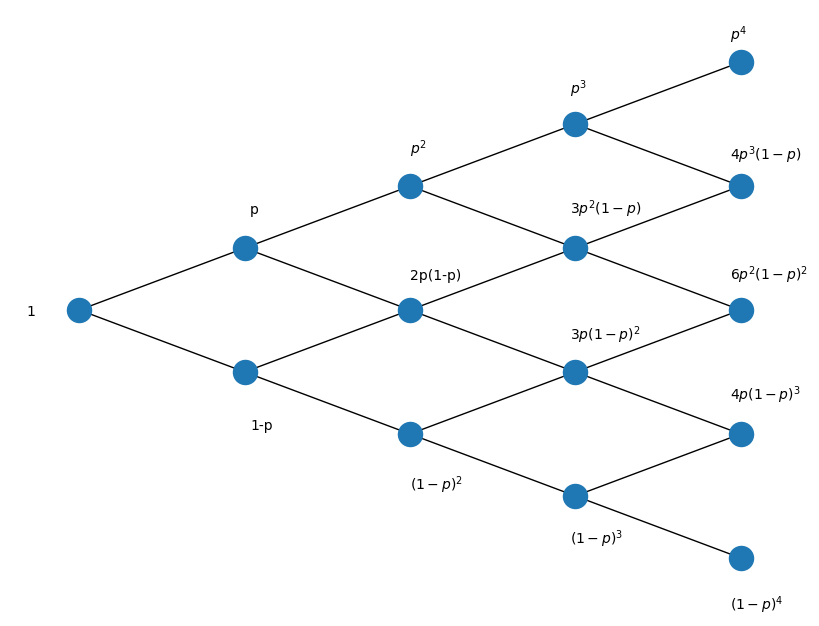

In [8]:
plot_probability()

In [8]:
def binomial_option(spot:float, strike:float, rate:float, sigma:float, time:float, steps:int, output:int=0):
   
    
    #params
        ts= time/steps #1/4=0.25 steps tree
        u = 1+sigma*np.sqrt(ts)
        v = 1-sigma*np.sqrt(ts)
        p = 0.5+rate*np.sqrt(ts)/(2*sigma)
        df = 1/(1+rate*ts)
    
    #initialize arrays
        px = np.zeros((steps+1,steps+1)) #price
        cp = np.zeros((steps+1,steps+1)) #payoff
        V = np.zeros((steps+1,steps+1)) #value of the option
        d = np.zeros((steps+1,steps+1))
    
    #binomial loops
    #forward loop
        for j in range(steps+1): #reverse
            for i in range(j+1):
                px[i,j] = spot*np.power(v,i)*np.power(u,j-i) #terminal price first
                cp[i,j] = np.maximum(px[i,j] - strike, 0)
            
        for j in range(steps+1,0,-1):
            for i in range(j):
                if(j==steps+1):
                    V[i,j-1] = cp[i, j-1]
                    if (px[i,j-1]>=strike):
                        d[i,j-1]=1
                    else:
                        d[i,j-1]=0
                else:
                    V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                    d[i,j-1] = V[i,j]-V[i+1,j]/(px[i,j]-px[i+1,j])
                
            result = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,2)
    
            return result[output]

In [17]:
px = binomial_option(100,100,0.05,0.2,1,4,0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [20]:
#Intrinsic value
cp = binomial_option(100,100,0.05,0.2,1,4,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [19]:
#option price
ox = binomial_option(100,100,0.05,0.2,1,4,2)
ox

array([[ 0.  ,  0.  ,  0.  ,  0.  , 46.41],
       [ 0.  ,  0.  ,  0.  ,  0.  , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [21]:
#option delta
d = binomial_option(100,100,0.05,0.2,1,4,3)
d

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [25]:
print(f"European Call Option Price using Binomial Tree Method: {ox[0,0]}")

European Call Option Price using Binomial Tree Method: 0.0


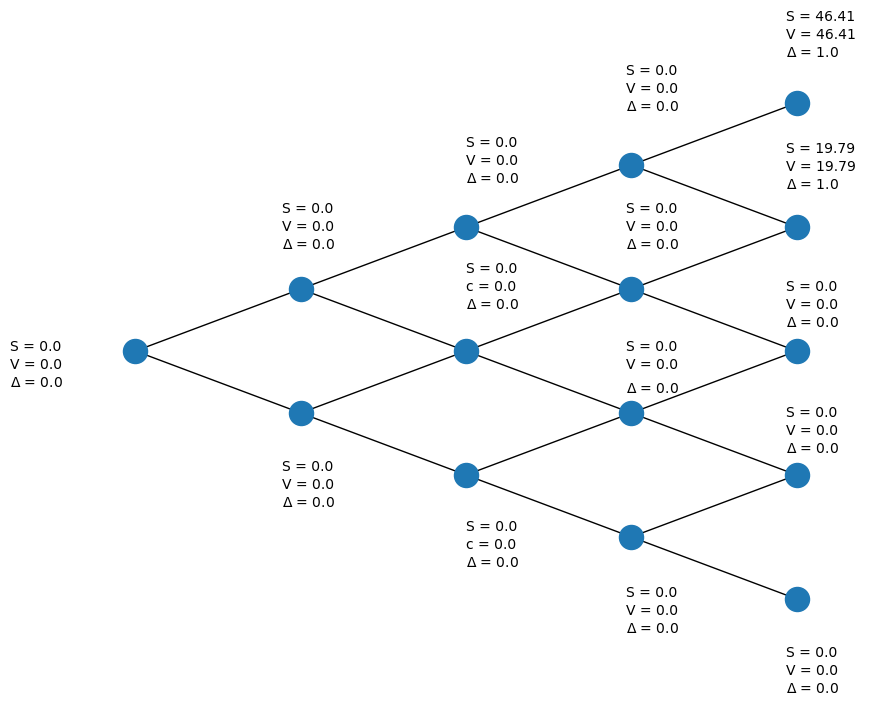

In [27]:
plot_binomial_tree(px[0,0], px, ox, d)